# Customer Churn Predictive Modeling

This notebook focuses on predicting customer churn for a telecommunications company using machine learning. Building on the cleaned and prepared dataset from the previous step, the goal is to develop a predictive model that can identify which customers are at risk of leaving.

Key steps in this process include:

- Splitting the dataset into features and target, and creating training and testing sets

- Fitting one or more machine learning models to the training data

- Evaluating model performance using metrics such as accuracy, confusion matrix, and comparison with the no information rate

- Interpreting the results to understand how the model can be applied in a business context

By predicting churn, the company can proactively target at-risk customers with retention strategies, improving customer satisfaction and reducing revenue loss.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

In [4]:
df = pd.read_csv('new_churn_data_.csv', index_col='customerID')
df

,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TotalCharges_tenure_ratio
customerID,,,,,,,,
7590-VHVEG,1,2,1,3,29.85,29.85,2,29.850000
5575-GNVDE,34,1,2,4,56.95,1889.50,2,55.573529
3668-QPYBK,2,1,1,4,53.85,108.15,1,54.075000
7795-CFOCW,45,2,2,1,42.30,1840.75,2,40.905556
9237-HQITU,2,1,1,3,70.70,151.65,1,75.825000
...,...,...,...,...,...,...,...,...
6840-RESVB,24,1,2,4,84.80,1990.50,2,82.937500
2234-XADUH,72,1,2,2,103.20,7362.90,2,102.262500
4801-JZAZL,11,2,1,3,29.60,346.45,2,31.495455


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   tenure                     7043 non-null   int64  
 1   PhoneService               7043 non-null   int64  
 2   Contract                   7043 non-null   int64  
 3   PaymentMethod              7043 non-null   int64  
 4   MonthlyCharges             7043 non-null   float64
 5   TotalCharges               7043 non-null   float64
 6   Churn                      7043 non-null   int64  
 7   TotalCharges_tenure_ratio  7043 non-null   float64
dtypes: float64(3), int64(5)
memory usage: 495.2+ KB


In [6]:
features = df.drop('Churn', axis=1)
targets = df['Churn']

In [1]:
x_train, x_test, y_train, y_test = train_test_split(features, targets, stratify=targets, random_state=3)

NameError: name 'train_test_split' is not defined

In [8]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [39]:
import pandas as pd
import numpy as np
def calculate_nir(df, target_column):
    counts = df[target_column].value_counts()
    total_instances = len(df)
    nir = counts.max() / total_instances
    return nir
nir = calculate_nir(df, 'Churn')
print(f'No Information Rate (NIR): {nir:.4f}')

No Information Rate (NIR): 0.7346


In [9]:
df['Churn'].value_counts(normalize=True)

Churn
2    0.73463
1    0.26537
Name: proportion, dtype: float64

In [10]:
print(lr_model.score(x_train, y_train))
print(lr_model.score(x_test, y_test))

0.7921241953805377
0.8001135718341851


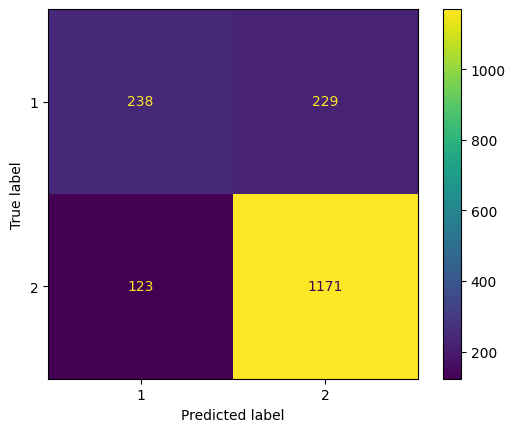

In [11]:
ConfusionMatrixDisplay.from_estimator(lr_model, x_test, y_test)

In [13]:
print(f"Test set size: {len(x_test)}")

Test set size: 1761


### How the ML algorithm could be used in a business setting:

Machine learning algorithms allow companies to predict future events based on existing data, such as customer churn or low sales during a specific period. By anticipating these outcomes, businesses can take proactive actions to prevent negative results. For example, in marketing, campaigns can be targeted specifically at customers who are likely to leave, helping to retain them.

Being automated, these algorithms provide a fast and efficient tool for decision-making. It is crucial to ensure that an appropriate and effective model is chosen for the situation being predicted.

## Conclusion

I first verified that there were no missing values. I then separated the data into features and target, and split it into training and test sets using random_state=3. I fitted a logistic regression model to the training data.

Evaluation showed that the model performs well: the Non-Information Rate (NIR) is 0.73, while the model achieved 0.79 accuracy on the training set and 0.80 on the test set, both significantly above the NIR and without signs of overfitting. The confusion matrix revealed the following: 238 customers were correctly predicted as staying, 229 were incorrectly predicted as staying, 123 were incorrectly predicted as leaving, and 1,171 were correctly predicted as leaving.

Correctly identifying 1,171 leaving customers demonstrates that the model is effective at detecting at-risk customers, which is the primary goal of this analysis.

Maryi Tatiana Palacios Giraldo